In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from xgboost import XGBClassifier

In [2]:
path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/file/Train_file.csv"
data = pd.read_csv(path)

path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/Europe.csv"
Europe = list(pd.read_csv(path))
path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/Asia.csv"
Asia = list(pd.read_csv(path))
path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/Oceania.csv"
Oceania = list(pd.read_csv(path))
path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/N America.csv"
N_America = list(pd.read_csv(path))
path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/S America.csv"
S_America = list(pd.read_csv(path))
path = "/Users/pritigirishvankudre/Day7_BasicML/Insurance/Africa.csv"
Africa = list(pd.read_csv(path))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
ID                      62288 non-null int64
Age                     62288 non-null int64
Agency                  62288 non-null object
Agency Type             62288 non-null object
Commision (in value)    62288 non-null float64
Destination             62288 non-null object
Distribution Channel    62288 non-null object
Duration                62288 non-null int64
Gender                  22713 non-null object
Net Sales               62288 non-null float64
Product Name            62288 non-null object
Claim                   62288 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


In [3]:
data.head(10)

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.50,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.00,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.00,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.00,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.60,Rental Vehicle Excess Insurance,0
5,9279,39,CWT,Travel Agency,59.40,AUSTRALIA,Online,78,NaN,99.00,Rental Vehicle Excess Insurance,0
6,6217,34,CWT,Travel Agency,23.76,AUSTRALIA,Online,27,NaN,0.00,Rental Vehicle Excess Insurance,0
7,52027,45,JZI,Airlines,9.10,HONG KONG,Online,10,M,26.00,Basic Plan,0
8,24167,32,C2B,Airlines,63.21,SINGAPORE,Online,368,M,252.85,Annual Silver Plan,1
9,19885,59,C2B,Airlines,63.21,SINGAPORE,Online,377,F,252.85,Annual Silver Plan,0


In [4]:
data.describe()

,ID,Age,Commision (in value),Duration,Net Sales,Claim
count,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000
mean,32844.953458,39.666324,12.829703,60.958804,50.717064,0.200006
std,18065.417216,14.014652,23.498745,114.325330,63.166715,0.400008
min,0.000000,0.000000,0.000000,-2.000000,-389.000000,0.000000
25%,17579.000000,33.000000,0.000000,10.000000,20.000000,0.000000
50%,33446.500000,36.000000,1.880000,25.000000,29.700000,0.000000
75%,48532.250000,43.000000,14.440000,59.000000,58.000000,0.000000
max,63323.000000,118.000000,262.760000,4881.000000,682.000000,1.000000


# Problem Description

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 50553 customers and the test dataset consists of 12661 customers. Following are the features of the dataset

Target: 
Claim Status (Claim)

Name of agency (Agency)

Type of travel insurance agencies (Agency.Type)

Distribution channel of travel insurance agencies (Distribution.Channel)

Name of the travel insurance products (Product.Name)

Duration of travel (Duration)

Destination of travel (Destination)

Amount of sales of travel insurance policies (Net.Sales)

The commission received for travel insurance agency (Commission)

Gender of insured (Gender)

Age of insured (Age)

In [116]:
base_model = data[['Age','Agency Type','Destination','Commision (in value)','Net Sales','Distribution Channel','Duration','Gender','Product Name','Claim']]

In [117]:
# OHE for Agency Type, Distribution Channels

base_model = pd.get_dummies(base_model, columns=['Agency Type','Distribution Channel'], drop_first=False)

In [118]:
# Categorize Destination into Continents and use OHE for Destination

base_model['Destination'].str.strip()
for i in base_model['Destination']:
    if i in Europe:
        base_model['Destination'].replace(i,'Europe',inplace=True)
    if i in Asia:
        base_model['Destination'].replace(i,'Asia',inplace=True)
    if i in N_America:
        base_model['Destination'].replace(i,'N_America',inplace=True)
    if i in S_America:
        base_model['Destination'].replace(i,'S_America',inplace=True)
    if i in Oceania:
        base_model['Destination'].replace(i,'Oceania',inplace=True)
    if i in Africa:
        base_model['Destination'].replace(i,'Africa',inplace=True)
    
base_model = pd.get_dummies(base_model, columns=['Destination'], drop_first=False)
base_model.head()

,Age,Commision (in value),Net Sales,Duration,Gender,Product Name,Claim,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Destination_Africa,Destination_Asia,Destination_Europe,Destination_N_America,Destination_Oceania,Destination_S_America
0,28,28.13,112.5,34,F,Silver Plan,1,1,0,0,1,0,1,0,0,0,0
1,37,12.95,37.0,53,F,Basic Plan,0,1,0,0,1,0,1,0,0,0,0
2,27,0.00,13.0,28,NaN,Cancellation Plan,0,0,1,0,1,0,0,0,1,0,0
3,36,0.00,34.0,1,NaN,Cancellation Plan,0,0,1,0,1,0,1,0,0,0,0
4,26,23.76,39.6,33,NaN,Rental Vehicle Excess Insurance,0,0,1,0,1,0,1,0,0,0,0


In [119]:
# Fill NaN in Gender with Unspecified and use OHE for Destinatio

base_model['Gender'].fillna('NA', inplace=True)
base_model = pd.get_dummies(base_model, columns=['Gender'], drop_first=False)

In [120]:
#for j in base_model[base_model['Duration'] < 1]['Duration'].index:
#    base_model['Duration'][j] = 1
    
#for j in base_model[base_model['Commision (in value)'] < 0]['Commision (in value)'].index:
#    base_model['Commision (in value)'][j] = (base_model['Commision (in value)'][j])*(-1)
    
#for j in base_model[base_model['Net Sales'] < 0]['Net Sales'].index:
#    base_model['Net Sales'][j] = (base_model['Net Sales'][j])*(-1)

In [121]:
#base_model = pd.get_dummies(base_model, columns=['Product Name'], drop_first=False)

In [122]:
#prod_aggr = base_model.pivot_table(index='Product Name', values='Claim', aggfunc=['mean', 'count'])
#prod_aggr

Dropping ID column but attaching a sensible number to Product Name and dropping original column Product Name

In [123]:
# Converting all IDs to sensible numbers (Risk of default - inspired by WOE) and dropping original columns

id_ls = ['Product Name']

for col in id_ls:
    newcol = col + '_risk'
    base_model[newcol] = base_model.groupby(col)['Claim'].transform('mean')
    
base_model.drop(['Product Name'],axis=1,inplace=True)

In [124]:
#cols = ['Age','Commision (in value)','Net Sales','Duration']

#for i in cols:
#    base_model[i] = np.sqrt(base_model[i])

In [125]:
#base_model.drop(['Distribution Channel_Offline','Distribution Channel_Online','Destination_Africa','Destination_Asia','Destination_Europe','Destination_N_America','Destination_Oceania','Destination_S_America'],axis=1,inplace=True)

base_model.skew()

Age                              2.865721
Commision (in value)             3.367643
Net Sales                        2.711346
Duration                        14.862930
Claim                            1.499986
Agency Type_Airlines             0.653439
Agency Type_Travel Agency       -0.653439
Distribution Channel_Offline     7.268728
Distribution Channel_Online     -7.268728
Destination_Africa              15.595301
Destination_Asia                -1.512206
Destination_Europe               3.136724
Destination_N_America            4.164364
Destination_Oceania              3.560363
Destination_S_America           19.471925
Gender_F                         1.627903
Gender_M                         1.663467
Gender_NA                       -0.562434
Product Name_risk                1.225799
dtype: float64

In [126]:
base_model['Claim'].value_counts()

0    49830
1    12458
Name: Claim, dtype: int64

# Application of logistic regression to create baseline scores

In [105]:
X = base_model.drop('Claim', axis=1)
y = base_model['Claim']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=7)

In [106]:
# Finding out best possible hyperparameters (to avoid overfitting/underfitting of model) and to achieve best possible accuracy.

grid={"C":[1,10,100,1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.8286277837664274


In [107]:
# While buiding Logistic Regression Model we need to use C : 1 and penalty : l2
# Creating Baseline model Using Logistic Regression and above hyperparameters

# defining the model
classifier = LogisticRegression(solver='liblinear')
grid={"C":[1], "penalty":["l2"]}
classifier_cv = GridSearchCV(classifier,grid,cv=10)

# fitting the model
classifier_cv.fit(X_train,y_train)

# predicting test result with model
y_pred = classifier_cv.predict(X_test)

In [108]:
# Creating Confusion matrix to find accuracy score

conf_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy of the Baseline Logistic Regression is ",accuracy*100)

Accuracy of the Baseline Logistic Regression is  83.03098410659817


In [109]:
# Creating Classification report for Logistic Regression Baseline model

print ("Classification Report for Baseline Logistic Regression")
print(classification_report(y_test,y_pred))

Classification Report for Baseline Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14972
           1       0.63      0.37      0.46      3715

    accuracy                           0.83     18687
   macro avg       0.74      0.66      0.68     18687
weighted avg       0.81      0.83      0.81     18687



# Application of random forest classifier to create baseline scores
-- Due to limitations with my system performance dropping hyperparameter tunning with RFC

In [110]:
# Creating Baseline model Using RandomForest Classifier and above hyperparameters

# defining the model
classifier = RandomForestClassifier(n_jobs=-1)
grid={"n_estimators":[100,200,300], "max_depth":[2,3,4,None], "bootstrap": [True]}
classifier_cv = GridSearchCV(classifier,grid,cv=10,n_jobs = -1,verbose = 2)
classifier_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",classifier_cv.best_params_)
print("accuracy :",classifier_cv.best_score_)
#print("recall :",classifier_cv.best_recall_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.0min finished


tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'n_estimators': 200}
accuracy : 0.9825004013669412


In [111]:
classifier = RandomForestClassifier()
grid={'bootstrap': [True], 'max_depth': [None], 'n_estimators': [200]}
classifier_cv = GridSearchCV(classifier,grid,cv=10)


# fitting the model
classifier_cv.fit(X_train,y_train)

# predicting test result with model
y_pred = classifier_cv.predict(X_test)

In [112]:
# Creating Confusion matrix to find accuracy score

conf_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy of the Baseline RandomForest Classifier is ",accuracy*100)

Accuracy of the Baseline RandomForest Classifier is  98.36784930700487


In [113]:
# Creating Classification report for RandomForest Classifier Baseline model

print ("Classification Report for Baseline RandomForest Classifier")
print(classification_report(y_test,y_pred))

Classification Report for Baseline RandomForest Classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14972
           1       0.93      0.99      0.96      3715

    accuracy                           0.98     18687
   macro avg       0.96      0.99      0.98     18687
weighted avg       0.98      0.98      0.98     18687



In [54]:
# Hyperparameter tunning for XGBclassifier

classifier = XGBClassifier()
#grid={"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],"min_child_weight": [ 1, 3, 5, 7 ],"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],"colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ] }
grid={"learning_rate": [0.05, 0.10, 0.15] ,"max_depth": [ 3, 4, 5],"min_child_weight": [ 1, 3 ],"gamma": [ 0.0, 0.1],"colsample_bytree": [ 0.3, 0.4] }
classifier_cv = GridSearchCV(classifier,grid,cv=2,n_jobs = -1,verbose = 2)
classifier_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",classifier_cv.best_params_)
print("accuracy :",classifier_cv.best_score_)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.6min finished


tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 3}
accuracy : 0.8600581530173567


In [78]:
classifier = XGBClassifier(learning_rate=0.15 ,max_depth=5,min_child_weight=3,gamma=0.0,colsample_bytree=0.4)


# fitting the model
classifier.fit(X_train,y_train)

# predicting test result with model
y_pred = classifier.predict(X_test)

In [79]:
# Creating Confusion matrix to find accuracy score

conf_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy of the Baseline RandomForest Classifier is ",accuracy*100)

Accuracy of the Baseline RandomForest Classifier is  86.09728688393


In [80]:
# Creating Classification report for RandomForest Classifier Baseline model

print ("Classification Report for Baseline RandomForest Classifier")
print(classification_report(y_test,y_pred))

Classification Report for Baseline RandomForest Classifier
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5021
           1       0.69      0.52      0.59      1208

    accuracy                           0.86      6229
   macro avg       0.79      0.73      0.75      6229
weighted avg       0.85      0.86      0.85      6229



In [58]:
classifier = XGBClassifier()
grid={"learning_rate": [0.20, 0.25, 0.30 ] ,"max_depth": [6, 8, 10, 12, 15],"min_child_weight": [5, 7 ],"gamma": [0.2 , 0.3, 0.4 ],"colsample_bytree": [0.5 , 0.7 ] }
#grid={"learning_rate": [0.05, 0.10, 0.15] ,"max_depth": [ 3, 4, 5],"min_child_weight": [ 1, 3 ],"gamma": [ 0.0, 0.1],"colsample_bytree": [ 0.3, 0.4] }
classifier_cv = GridSearchCV(classifier,grid,cv=2,n_jobs = -1,verbose = 2)
classifier_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",classifier_cv.best_params_)
print("accuracy :",classifier_cv.best_score_)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 16.1min finished


tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.3, 'max_depth': 15, 'min_child_weight': 5}
accuracy : 0.9584723238017089


In [81]:
classifier = XGBClassifier(learning_rate=0.3,max_depth=15,min_child_weight=5,gamma=0.4,colsample_bytree=0.7)


# fitting the model
classifier.fit(X_train,y_train)

# predicting test result with model
y_pred = classifier.predict(X_test)

In [82]:
# Creating Confusion matrix to find accuracy score

conf_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy of the Baseline RandomForest Classifier is ",accuracy*100)

Accuracy of the Baseline RandomForest Classifier is  97.75244822603949


In [83]:
# Creating Classification report for RandomForest Classifier Baseline model

print ("Classification Report for Baseline RandomForest Classifier")
print(classification_report(y_test,y_pred))

Classification Report for Baseline RandomForest Classifier
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5021
           1       0.92      0.97      0.94      1208

    accuracy                           0.98      6229
   macro avg       0.96      0.97      0.96      6229
weighted avg       0.98      0.98      0.98      6229



# Once baseline model is created, we will have additional preprocessing in terms of understanding outliers, treating the same.

-- Understanding the Outliers

1. ID = Drop >> done
2. Age = Will try to analyze and treat Outliers
3. Agency = Drop >> done
4. Agency Type = Lable Encoding using OHE >> done
5. Commision (in value) = Will try to analyze and treat Outliers
6. Destination = Categorize into Continents and then OHE >> done
7. Distribution Channel = Label Encoding using OHE >> done
8. Duration = Will try to analyze and treat Outliers
9. Gender = will replace NaN with 'NA' and use OHE >> done
10. Net Sales = Will try to analyze and treat Outliers
11. Product Name = Will treat this with some Mean/Ratio/Probablity value and dropping the original >> done
12. Claim = Will keep as it is

In [3]:
final_model = data[['Age','Agency Type','Destination','Distribution Channel','Duration','Gender','Product Name','Commision (in value)','Net Sales','Claim']]

final_model['Destination'].str.strip()
for i in final_model['Destination']:
    if i in Europe:
        final_model['Destination'].replace(i,'Europe',inplace=True)
    if i in Asia:
        final_model['Destination'].replace(i,'Asia',inplace=True)
    if i in N_America:
        final_model['Destination'].replace(i,'N_America',inplace=True)
    if i in S_America:
        final_model['Destination'].replace(i,'S_America',inplace=True)
    if i in Oceania:
        final_model['Destination'].replace(i,'Oceania',inplace=True)
    if i in Africa:
        final_model['Destination'].replace(i,'Africa',inplace=True)
        
final_model['Gender'].fillna('NA', inplace=True)

final_model = pd.get_dummies(final_model, columns=['Agency Type','Distribution Channel','Destination','Gender'], drop_first=False)

final_model['Prod_Nm_risk'] = final_model.groupby('Product Name')['Claim'].transform('mean')
    
final_model.drop(['Product Name'],axis=1,inplace=True)

final_model.info()

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 19 columns):
Age                             62288 non-null int64
Duration                        62288 non-null int64
Commision (in value)            62288 non-null float64
Net Sales                       62288 non-null float64
Claim                           62288 non-null int64
Agency Type_Airlines            62288 non-null uint8
Agency Type_Travel Agency       62288 non-null uint8
Distribution Channel_Offline    62288 non-null uint8
Distribution Channel_Online     62288 non-null uint8
Destination_Africa              62288 non-null uint8
Destination_Asia                62288 non-null uint8
Destination_Europe              62288 non-null uint8
Destination_N_America           62288 non-null uint8
Destination_Oceania             62288 non-null uint8
Destination_S_America           62288 non-null uint8
Gender_F                        62288 non-null uint8
Gender_M                        62288 n

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


-- Understanding Outliers and treating them

In [64]:
# To identify outliers in the dataset

def get_outliers(self):
        a_list = []
        per_75 = np.percentile(self,75)
        per_25 = np.percentile(self,25)
        iqr = per_75-per_25
        tot_75 = per_75 + (1.5*iqr)
        tot_25 = per_25 - (1.5*iqr)
        a_list1 = np.array(self).tolist()
        for j in a_list1:
            if j > tot_75:
                a_list.append(j)
            if j < tot_25:
                a_list.append(j)
        return a_list

for i in ['Age','Duration','Commision (in value)','Net Sales']:
    outliers = get_outliers(final_model[i])
    print ("Total outliers in Column",final_model[i].name," =",len(outliers))
    print ("Percentatge of outliers in Column",final_model[i].name," =",round(((len(outliers)/final_model.shape[0])*100),2))
    print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

Total outliers in Column Age  = 4706
Percentatge of outliers in Column Age  = 7.56
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Duration  = 6758
Percentatge of outliers in Column Duration  = 10.85
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Commision (in value)  = 7362
Percentatge of outliers in Column Commision (in value)  = 11.82
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Net Sales  = 5564
Percentatge of outliers in Column Net Sales  = 8.93
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **


<IPython.core.display.Javascript object>


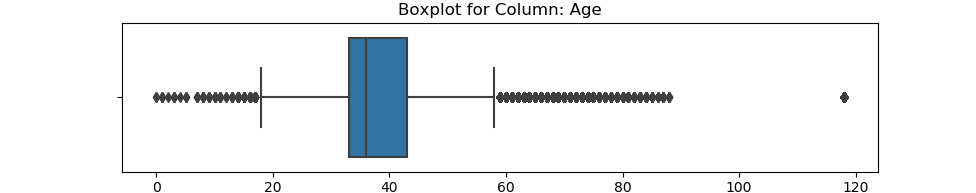

<IPython.core.display.Javascript object>


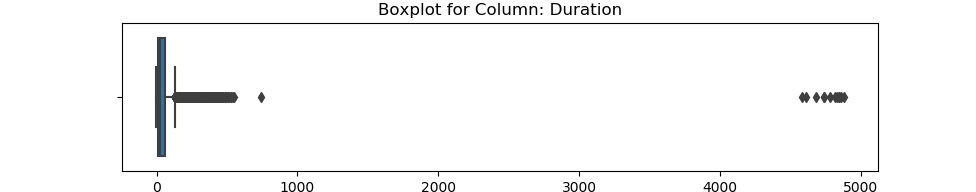

<IPython.core.display.Javascript object>


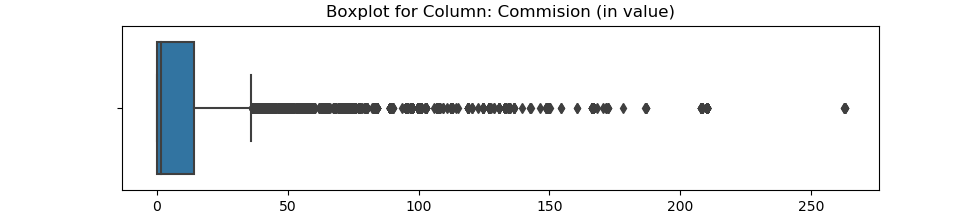

<IPython.core.display.Javascript object>


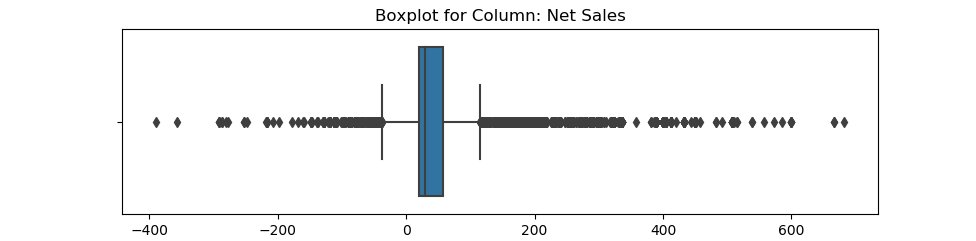

In [49]:
# Visualizing Outliers with boxplot

def visualisation(column_1):
    plt.figure(figsize=(20,1))
    plt.title("Boxplot for Column: "+column_1.name)
    sns.boxplot(column_1)
    plt.show()

for i in ['Age','Duration','Commision (in value)','Net Sales']:
    visualisation(final_model[i])

In [10]:
# We will treat higher order outliers of Age and replace it with a random value between 18 (33-1.5*IQR) to 58 (43+1.5*IQR)

#for j in final_model[final_model['Age'] > 90]['Age'].index:
#    final_model['Age'][j] = 39

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
# We will treat outliers for duration as Airlines and Travel Insurance Duration should not be so high as per my understanding.

#for j in final_model[final_model['Duration'] < 1]['Duration'].index:
#    final_model['Duration'][j] = 60

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
# We will treat outliers for duration as Airlines and Travel Insurance Duration should not be so high as per my understanding.

#for j in final_model[final_model['Duration'] > 74]['Duration'].index:
#    final_model['Duration'][j] = 60

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
# We will treat outliers for commission

#for j in final_model[final_model['Commision (in value)'] > 21.66]['Commision (in value)'].index:
#    final_model['Commision (in value)'][j] = 12

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
for j in final_model[final_model['Duration'] < 1]['Duration'].index:
    final_model['Duration'][j] = 1
    
for j in final_model[final_model['Commision (in value)'] < 0]['Commision (in value)'].index:
    final_model['Commision (in value)'][j] = (final_model['Commision (in value)'][j])*(-1)
    
for j in final_model[final_model['Net Sales'] < 0]['Net Sales'].index:
    final_model['Net Sales'][j] = (final_model['Net Sales'][j])*(-1)

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# To check on skewness
-- If skewness is less than -1 or greater than 1, the distribution is highly skewed.

-- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

-- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

-- Left skewed (long tail to the left) is Negative Skewness

-- Right skewed (long tail to the right) is Positive Skewness

In [5]:
final_model.skew(axis = 0)

Age                              2.865721
Duration                        14.863102
Commision (in value)             3.367643
Net Sales                        2.888952
Claim                            1.499986
Agency Type_Airlines             0.653439
Agency Type_Travel Agency       -0.653439
Distribution Channel_Offline     7.268728
Distribution Channel_Online     -7.268728
Destination_Africa              15.595301
Destination_Asia                -1.512206
Destination_Europe               3.136724
Destination_N_America            4.164364
Destination_Oceania              3.560363
Destination_S_America           19.471925
Gender_F                         1.627903
Gender_M                         1.663467
Gender_NA                       -0.562434
Prod_Nm_risk                     1.225799
dtype: float64

In [6]:
final_model.head()

,Age,Duration,Commision (in value),Net Sales,Claim,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Destination_Africa,Destination_Asia,Destination_Europe,Destination_N_America,Destination_Oceania,Destination_S_America,Gender_F,Gender_M,Gender_NA,Prod_Nm_risk
0,28,34,28.13,112.5,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0.535656
1,37,53,12.95,37.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0.069453
2,27,28,0.00,13.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0.039469
3,36,1,0.00,34.0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.039469
4,26,33,23.76,39.6,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.145802


-- Agency Type_Airlines, Agency Type_Travel Agency, Distribution Channel_Offline, Distribution Channel_Online, Destination_Africa, Destination_Asia, Destination_Europe, Destination_N_America, Destination_Oceania, Destination_S_America, Gender_F, Gender_M, Gender_NA, will not correct skewness as categorical reduced to binary data.

-- Below skewness to be treated
1. Age (right skewness)
2. Duration (right skewness)
3. Net Sales (right skewness)
4. Prod_Nm_risk (right skewness)
5. Commission (in value) (right skewness)

-- But for now we will feed the data as it is to the model

In [16]:
X = final_model.drop('Claim', axis=1)
y = final_model['Claim']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=7)

# Application of Logistic Regression Model with RFE Feature Selection

In [19]:
feature_sel = [19,16,13,10]

logreg = LogisticRegression(penalty='l2',C=1.0)

for i in feature_sel:
    rfe = RFE(logreg, i)
    rfe.fit(X, y)

# Selecting top 5 columns

    sel_cols = []
    for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
        if b == 1:
            sel_cols.append(c)
    print ('Number of features selected are ::',i)
    print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

    X_sel = X[sel_cols]

# Split data in to train and test

    X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)
    
# Fit and Predict the model using selected number of features    
    
    logreg.fit(X_sel_train, y_sel_train)
    logreg_pred = logreg.predict(X_sel_test)

# Classification Report    
    
    print(classification_report(y_sel_test,logreg_pred))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of features selected are :: 19
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Distribution Channel_Online', 'Destination_Africa', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']


/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14972
           1       0.63      0.36      0.46      3715

    accuracy                           0.83     18687
   macro avg       0.74      0.65      0.68     18687
weighted avg       0.81      0.83      0.81     18687



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of features selected are :: 16
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Destination_Africa', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']


/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14972
           1       0.62      0.38      0.47      3715

    accuracy                           0.83     18687
   macro avg       0.74      0.66      0.68     18687
weighted avg       0.81      0.83      0.81     18687



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

Number of features selected are :: 13
Columns Selected are :: ['Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Destination_Africa', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']


/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14972
           1       0.60      0.38      0.47      3715

    accuracy                           0.83     18687
   macro avg       0.73      0.66      0.68     18687
weighted avg       0.81      0.83      0.81     18687



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

Number of features selected are :: 10
Columns Selected are :: ['Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Destination_Asia', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14972
           1       0.60      0.38      0.47      3715

    accuracy                           0.83     18687
   macro avg       0.73      0.66      0.68     18687
weighted avg       0.81      0.83      0.81     18687



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Application of Random Forest Classifier with Feature Selection

In [21]:
feature_sel = [19,16,13]

rforc = RandomForestClassifier(n_estimators=100,max_depth=2)

for i in feature_sel:
    rfe = RFE(rforc, i)
    rfe.fit(X, y)

# Selecting top 5 columns

    sel_cols = []
    for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
        if b == 1:
            sel_cols.append(c)
    print ('Number of features selected are ::',i)
    print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

    X_sel = X[sel_cols]

# Split data in to train and test

    X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)
    
# Fit and Predict the model using selected number of features    
    grid={"n_estimators":[100], "max_depth":[2]}
    rforc_cv = GridSearchCV(rforc,grid,cv=10)
    rforc_cv.fit(X_sel_train, y_sel_train)
    rforc_pred = rforc_cv.predict(X_sel_test)

# Classification Report    
    
    print(classification_report(y_sel_test,rforc_pred))

Number of features selected are :: 19
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Distribution Channel_Online', 'Destination_Africa', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     14972
           1       0.68      0.21      0.32      3715

    accuracy                           0.82     18687
   macro avg       0.76      0.59      0.61     18687
weighted avg       0.80      0.82      0.78     18687

Number of features selected are :: 16
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Distribution Channel_Online', 'Destination_

# Test Models

In [7]:
test_model = final_model.copy()
test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 19 columns):
Age                             62288 non-null int64
Duration                        62288 non-null int64
Commision (in value)            62288 non-null float64
Net Sales                       62288 non-null float64
Claim                           62288 non-null int64
Agency Type_Airlines            62288 non-null uint8
Agency Type_Travel Agency       62288 non-null uint8
Distribution Channel_Offline    62288 non-null uint8
Distribution Channel_Online     62288 non-null uint8
Destination_Africa              62288 non-null uint8
Destination_Asia                62288 non-null uint8
Destination_Europe              62288 non-null uint8
Destination_N_America           62288 non-null uint8
Destination_Oceania             62288 non-null uint8
Destination_S_America           62288 non-null uint8
Gender_F                        62288 non-null uint8
Gender_M                        62288 n

In [84]:
# Drop Commission, Net Sales, Gender, Prod_Nm_risk

#test_model.drop(['Commision (in value)','Net Sales','Agency Type_Airlines','Distribution Channel_Offline','Gender_M','Gender_NA'],axis=1,inplace=True)
#test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 13 columns):
Age                            62288 non-null int64
Duration                       62288 non-null int64
Claim                          62288 non-null int64
Agency Type_Travel Agency      62288 non-null uint8
Distribution Channel_Online    62288 non-null uint8
Destination_Africa             62288 non-null uint8
Destination_Asia               62288 non-null uint8
Destination_Europe             62288 non-null uint8
Destination_N_America          62288 non-null uint8
Destination_Oceania            62288 non-null uint8
Destination_S_America          62288 non-null uint8
Gender_F                       62288 non-null uint8
Prod_Nm_risk                   62288 non-null float64
dtypes: float64(1), int64(3), uint8(9)
memory usage: 2.4 MB


In [8]:
X = test_model.drop('Claim', axis=1)
y = test_model['Claim']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=7)

In [9]:
feature_sel = [18]

rforc = RandomForestClassifier()

for i in feature_sel:
    rfe = RFE(rforc, i)
    rfe.fit(X, y)

# Selecting columns

    sel_cols = []
    for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
        if b == 1:
            sel_cols.append(c)
    print ('Number of features selected are ::',i)
    print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

    X_sel = X[sel_cols]

# Split data in to train and test

    X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)
    
# Fit and Predict the model using selected number of features    
    grid={"n_estimators":[100], "max_depth":[2]}
    rforc_cv = GridSearchCV(rforc,grid,cv=15)
    rforc_cv.fit(X_sel_train, y_sel_train)
    rforc_pred = rforc_cv.predict(X_sel_test)

# Classification Report    
    
    print(classification_report(y_sel_test,rforc_pred))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features selected are :: 18
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Distribution Channel_Online', 'Destination_Africa', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     14972
           1       0.68      0.22      0.33      3715

    accuracy                           0.82     18687
   macro avg       0.76      0.60      0.61     18687
weighted avg       0.80      0.82      0.79     18687



In [10]:
y_test_1 = pd.read_csv('/Users/pritigirishvankudre/Day7_BasicML/Insurance/file/Test_file.csv')

conf_mat = confusion_matrix(y_test_1,rforc_pred)
accuracy = accuracy_score(y_test_1,rforc_pred)
print ("Accuracy of the Baseline RandomForest Classifier is ",accuracy*100)

ValueError: Found input variables with inconsistent numbers of samples: [15572, 18687]

# Test Model 2

In [96]:
test_model2 = final_model.copy()
test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 19 columns):
Age                             62288 non-null int64
Duration                        62288 non-null int64
Commision (in value)            62288 non-null float64
Net Sales                       62288 non-null float64
Claim                           62288 non-null int64
Agency Type_Airlines            62288 non-null uint8
Agency Type_Travel Agency       62288 non-null uint8
Distribution Channel_Offline    62288 non-null uint8
Distribution Channel_Online     62288 non-null uint8
Destination_Africa              62288 non-null uint8
Destination_Asia                62288 non-null uint8
Destination_Europe              62288 non-null uint8
Destination_N_America           62288 non-null uint8
Destination_Oceania             62288 non-null uint8
Destination_S_America           62288 non-null uint8
Gender_F                        62288 non-null uint8
Gender_M                        62288 n

In [97]:
test_model2['Destination_Africa'] = test_model2.groupby('Destination_Africa')['Claim'].transform('mean')
test_model2['Destination_Asia'] = test_model2.groupby('Destination_Asia')['Claim'].transform('mean')
test_model2['Destination_Europe'] = test_model2.groupby('Destination_Europe')['Claim'].transform('mean')
test_model2['Destination_N_America'] = test_model2.groupby('Destination_N_America')['Claim'].transform('mean')
test_model2['Destination_Oceania'] = test_model2.groupby('Destination_Oceania')['Claim'].transform('mean')
test_model2['Destination_S_America'] = test_model2.groupby('Destination_S_America')['Claim'].transform('mean')
test_model2['Gender_F'] = test_model2.groupby('Gender_F')['Claim'].transform('mean')
test_model2['Gender_M'] = test_model2.groupby('Gender_M')['Claim'].transform('mean')
test_model2['Gender_NA'] = test_model2.groupby('Gender_NA')['Claim'].transform('mean')
test_model2.head()

,Age,Duration,Commision (in value),Net Sales,Claim,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Destination_Africa,Destination_Asia,Destination_Europe,Destination_N_America,Destination_Oceania,Destination_S_America,Gender_F,Gender_M,Gender_NA,Prod_Nm_risk
0,28,34,12.00,112.5,1,1,0,0,1,0.200081,0.207663,0.202843,0.199905,0.203441,0.200338,0.406827,0.166474,0.379959,0.535656
1,37,53,12.95,37.0,0,1,0,0,1,0.200081,0.207663,0.202843,0.199905,0.203441,0.200338,0.406827,0.166474,0.379959,0.069453
2,27,28,0.00,13.0,0,0,1,0,1,0.200081,0.169080,0.202843,0.201954,0.203441,0.200338,0.153256,0.166474,0.096728,0.039469
3,36,1,0.00,34.0,0,0,1,0,1,0.200081,0.207663,0.202843,0.199905,0.203441,0.200338,0.153256,0.166474,0.096728,0.039469
4,26,33,12.00,39.6,0,0,1,0,1,0.200081,0.207663,0.202843,0.199905,0.203441,0.200338,0.153256,0.166474,0.096728,0.145802


In [98]:
X = test_model2.drop('Claim', axis=1)
y = test_model2['Claim']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=7)

In [99]:
feature_sel = [18,15,12]

rforc = RandomForestClassifier()

for i in feature_sel:
    rfe = RFE(rforc, i)
    rfe.fit(X, y)

# Selecting columns

    sel_cols = []
    for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
        if b == 1:
            sel_cols.append(c)
    print ('Number of features selected are ::',i)
    print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

    X_sel = X[sel_cols]

# Split data in to train and test

    X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)
    
# Fit and Predict the model using selected number of features    
    grid={"n_estimators":[100], "max_depth":[2]}
    rforc_cv = GridSearchCV(rforc,grid,cv=15)
    rforc_cv.fit(X_sel_train, y_sel_train)
    rforc_pred = rforc_cv.predict(X_sel_test)

# Classification Report    
    
    print(classification_report(y_sel_test,rforc_pred))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features selected are :: 18
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Distribution Channel_Online', 'Destination_Africa', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Destination_S_America', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     14972
           1       0.68      0.21      0.32      3715

    accuracy                           0.82     18687
   macro avg       0.76      0.59      0.61     18687
weighted avg       0.80      0.82      0.78     18687



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

Number of features selected are :: 15
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Destination_Asia', 'Destination_Europe', 'Destination_N_America', 'Destination_Oceania', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     14972
           1       0.68      0.21      0.32      3715

    accuracy                           0.82     18687
   macro avg       0.76      0.59      0.61     18687
weighted avg       0.80      0.82      0.78     18687



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

Number of features selected are :: 12
Columns Selected are :: ['Age', 'Duration', 'Commision (in value)', 'Net Sales', 'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Destination_Asia', 'Destination_Europe', 'Gender_F', 'Gender_M', 'Gender_NA', 'Prod_Nm_risk']
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     14972
           1       0.67      0.23      0.34      3715

    accuracy                           0.82     18687
   macro avg       0.75      0.60      0.62     18687
weighted avg       0.80      0.82      0.79     18687



In [67]:
pip install Xgboost

     |████████████████████████████████| 686kB 1.2MB/s eta 0:00:01
  Stored in directory: /Users/pritigirishvankudre/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built Xgboost
Note: you may need to restart the kernel to use updated packages.


In [ ]:
test_model2 = base_model